<h1 style="color: #210e9c;">Final Project: <br> Pension Funds and reforms<br>OECD countries 2005-2020</h1>

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import glob 

%matplotlib inline
pd.set_option('display.max_columns', None)

## Data Extraction

In [2]:
path = os.getcwd() 

In [3]:
path

'/Users/saraynes.gs/Documents/Ironhack/Bootcamp/Labs/W9/Notebooks'

In [4]:
path_data = '/Users/saraynes.gs/Documents/Ironhack/Bootcamp/Labs/W9/Data'

csv_file_qog     = glob.glob(os.path.join(path_data, "qog_oecd_ts_jan24.csv"))[0]
csv_file_reforms = glob.glob(os.path.join(path_data, "OECD_reforms_coding.csv"))[0]
csv_file_oecd    = glob.glob(os.path.join(path_data, "OECD_all.csv"))[0]

data_qog     = pd.read_csv(csv_file_qog)
data_reforms = pd.read_csv(csv_file_reforms)
data_oecd    = pd.read_csv(csv_file_oecd)

df_reforms  = data_reforms.copy()
df_qog      = data_qog.copy()
df_oecd     = data_oecd.copy()

In [5]:
print(df_reforms.columns)
print(df_qog.columns)
print(df_oecd.columns)

Index(['Unnamed: 0', 'country', 'iso', 'year', 'iso_year', 'benefits_expand',
       'benefits_contract', 'benefits_both', 'contributions_expand',
       'contributions_contract', 'contributions_both', 'coverage_expand',
       'coverage_contract', 'coverage_both', 'diversificationsecurity_expand',
       'diversificationsecurity_contract', 'diversificationsecurity_both',
       'fees_expand', 'fees_contract', 'fees_both', 'taxes_expand',
       'taxes_contract', 'taxes_both', 'onlybenefits', 'onlycontributions',
       'onlycoverage', 'onlyds', 'onlyfees', 'onlytaxes', 'morethantwo',
       'morethanoneincludingtaxes', 'morethanonenottaxes', 'morethanoneyear',
       'investment', 'ccode', 'dup'],
      dtype='object')
Index(['ccode', 'cname', 'year', 'ccode_qog', 'cname_qog', 'ccodealp',
       'ccodecow', 'version', 'cname_year', 'ccodealp_year',
       ...
       'wwbi_psepemp', 'wwbi_psepempf', 'wwbi_psepempm', 'wwbi_psepempr',
       'wwbi_psepempu', 'wwbi_pupemphi', 'wwbi_pupemp

In [6]:
print(f"The QoG main dataframe shape is {df_qog.shape}")
print(f"The Coded Reforms dataframe shape is {df_reforms.shape}")
print(f"The OECD dataframe shape is {df_oecd.shape}")

The QoG main dataframe shape is (2964, 1126)
The Coded Reforms dataframe shape is (340, 36)
The OECD dataframe shape is (2565662, 26)


In [7]:
df_qog.head(3)

,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,aid_crsc,aid_crsio,al_ethnic2000,al_language2000,al_religion2000,atop_ally,atop_consult,atop_defensive,atop_neutrality,atop_nonagg,atop_number,atop_offensive,atop_transyr,banko_for1,banko_for1_db,banko_for2,banko_for2_db,banko_for3,banko_for3_db,banko_soe1,banko_soe1_db,banko_soe2,banko_soe2_db,banko_soe3,banko_soe3_db,bci_bci,bci_bcistd,bicc_gmi,bicc_hw,bicc_milexp,bicc_milper,biu_offrel,biu_relleg,bmr_dem,bmr_dembr,bmr_demdur,bmr_demfsuf,bmr_demmis,bmr_demtran,br_chpar,br_col,br_com,br_coup,br_cw,br_dem,br_elecpost,br_elect,br_elecyear,br_fcoup,br_mon,br_newconst,br_pres,br_pvote,br_regch,br_scoup,br_suff,cai_cai1,cai_cai2,cai_foetal,cai_life,cai_mental,cai_physical,cai_rape,cai_request,cai_social,cam_contest,cam_inclusive,cbi_cbiu,cbi_cbiw,cbi_cceo,cbi_cll,cbi_cobj,cbi_cpol,cbi_create,cbi_dec,cbi_dir,cbi_inc,cbi_ref,cbi_reg,cbie_board,cbie_boardref,cbie_cwne,cbie_finances,cbie_financesref,cbie_gmt,cbie_index,cbie_indexref,cbie_lending,cbie_lendingref,cbie_lvau,cbie_obj,cbie_objref,cbie_policy,cbie_policyref,cbie_report,cbie_reportref,ccp_buildsoc,ccp_cc,ccp_childwrk,ccp_civil,ccp_democ,ccp_equal,ccp_freerel,ccp_hr,ccp_infoacc,ccp_initiat,ccp_market,ccp_marriage,ccp_samesexm,ccp_slave,ccp_socialsm,ccp_strike,ccp_syst,ccp_systyear,ccp_taxes,chga_demo,chga_hinst,chisols_autend,chisols_auttrans,chisols_dem,chisols_demtrans,chisols_hybrid,chisols_indmil,chisols_mil,chisols_mixed,chisols_mon,chisols_nonindep,chisols_olig,chisols_other,chisols_parl,chisols_per,chisols_pres,chisols_regtrans,chisols_solschange,chisols_sp,chisols_totalldrtrans,chisols_warlord,ciri_assn,ciri_disap,ciri_dommov,ciri_elecsd,ciri_formov,ciri_injud,ciri_kill,ciri_physint,ciri_polpris,ciri_relfre,ciri_speech,ciri_tort,ciri_wecon,ciri_wopol,ciri_work_l_s,ciri_work_p_s,ciri_wosoc_l,ciri_wosoc_p,cpds_chg,cpds_enps,cpds_enpv,cpds_frel,cpds_frleg,cpds_govlr,cpds_govsup,cpds_la,cpds_lall,cpds_lcom,cpds_lcon,cpds_le,cpds_lfe,cpds_lg,cpds_ll,cpds_lls,cpds_lmo,cpds_lnl,cpds_lo,cpds_lp,cpds_lpc,cpds_lpen,cpds_lper,cpds_lr,cpds_lreg,cpds_lrel,cpds_ls,cpds_tg,cpds_va,cpds_vall,cpds_vcom,cpds_vcon,cpds_ve,cpds_vfe,cpds_vg,cpds_vl,cpds_vls,cpds_vmo,cpds_vnl,cpds_vo,cpds_vp,cpds_vpcom,cpds_vpen,cpds_vper,cpds_vr,cpds_vreg,cpds_vrel,cpds_vs,cpds_vt,cspf_sfi,dev_altv2,dev_othv2,dev_regv2,dev_tv2,diat_ati,diat_iti,diat_ti,dr_eg,dr_ig,dr_pg,dr_sg,ef_bul,ef_carb,ef_crop,ef_ef,ef_fg,ef_for,ef_gl,egov_egov,egov_epar,egov_hci,egov_osi,egov_tii,eu_resallt,eu_resedut,eu_resgovt,eu_sctrtotpmin,eu_scttotn,fao_luagr,fao_luagrara,fao_luagrcrop,fao_luagrirrac,fao_luagrirreqcrop,fao_luagrorg,fao_lucrop,fao_luforest,fao_luforplant,fao_luforreg,fe_cultdiv,fe_etfra,fe_lmin,fe_plural,fh_aor,fh_cl,fh_ep,fh_feb,fh_fog,fh_pair,fh_ppp,fh_pr,fh_rol,fh_status,fhp_mcei5,fhp_mclr5,fhp_mcpp5,fhp_score5,fhp_status5,fi_ftradeint,fi_ftradeint_pd,fi_index,fi_legprop,fi_legprop_pd,fi_reg,fi_reg_pd,fi_sm,fi_sm_pd,fi_sog,fi_sog_pd,gc_shr,gd_ptsa,gd_ptss,gea_ea1524f,gea_ea1524m,gea_ea2534f,gea_ea2534m,gea_ea3544f,gea_ea3544m,gea_ea4554f,gea_ea4554m,gea_ea5564f,gea_ea5564m,gea_ea65f,gea_ea65m,gfs_def,gfs_ecaf,gfs_educ,gfs_envr,gfs_gps,gfs_hca,gfs_heal,gfs_pos,gfs_rcr,gfs_sp,gggi_eas,gggi_ggi,gggi_hss,gggi_pes,gggi_pos,gii_gii,gle_cgdpc,gle_exp,gle_gdp,gle_imp,gle_pop,gle_rgdpc,gle_trade,gol_adm,gol_dist,gol_enep,gol_enep1,gol_enepo,gol_enpp,gol_enpp1,gol_enppo,gol_est,gol_est_spec,gol_inst,gol_mt,gol_nos,gol_pr,gol_preel,gol_upseat,gol_uptier,gpcr_eci,gpcr_growth,gpi_conf,gpi_gpi,gpi_mil,gpi_ss,gted_rfgdp,gted_rftax,gted_rfusd,gtm_parl,gtm_pr,gtm_unit,gtr_centaxdir1800,gtr_centaxdir1850,gtr_centaxgdp1800,gtr_centaxgdp1850,gtr_centaxind1800,gtr_centaxind1850,gtr_centaxtot1800,h_alignl1,h_f,h_j,h_l1,h_l2,h_lflo,h_polcon3,h_polcon5,hief_efindex,ht_colonial,ht_ipolity2,ht_partsz,ht_region,ht_regtype,ht_regtype1,iaep_ae,iaep_aecc,iaep_alcc,iaep_arr,iaep_basp,iaep_bp,iaep_callo,iaep_cc,iaep_

In [8]:
df_reforms.head(3)

,Unnamed: 0,country,iso,year,iso_year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment,ccode,dup
0,1,Australia,AUS,2006,AUS2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36,0
1,2,Australia,AUS,2008,AUS2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,36,0
2,3,Australia,AUS,2009,AUS2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,36,0


In [9]:
df_oecd.head(3)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Unnamed: 5,INDICATOR,Unnamed: 7,SUBJECT,Unnamed: 9,MEASURE,Unnamed: 11,FREQUENCY,Unnamed: 13,TIME_PERIOD,Unnamed: 15,OBS_VALUE,Unnamed: 17,OBS_STATUS,Unnamed: 19,UNIT_MEASURE,Unnamed: 21,UNIT_MULT,Unnamed: 23,BASE_PER,Unnamed: 25
0,DATAFLOW,OECD:DF_DP_LIVE(1.0),NaN,I,CHL,NaN,PUBLMPEXP,NaN,INCENTIVE,NaN,PC_GDP,NaN,A,NaN,2013,NaN,0.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD:DF_DP_LIVE(1.0),NaN,I,PRT,NaN,PUBLMPEXP,NaN,INCENTIVE,NaN,PC_GDP,NaN,A,NaN,2013,NaN,0.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD:DF_DP_LIVE(1.0),NaN,I,NZL,NaN,PUBLMPEXP,NaN,INCENTIVE,NaN,PC_GDP,NaN,A,NaN,2013,NaN,0.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the data
## 1. OECD DATA

In [10]:
df_oecd.isnull().sum().sort_values(ascending=False)

Unnamed: 13       2565662
Unnamed: 11       2565662
BASE_PER          2565662
Unnamed: 23       2565662
UNIT_MULT         2565662
Unnamed: 21       2565662
UNIT_MEASURE      2565662
Unnamed: 19       2565662
Unnamed: 17       2565662
Unnamed: 15       2565662
Unnamed: 25       2565662
Unnamed: 9        2565662
Unnamed: 7        2565662
Unnamed: 5        2565662
STRUCTURE_NAME    2565662
OBS_VALUE           33121
MEASURE                 0
FREQUENCY               0
STRUCTURE_ID            0
TIME_PERIOD             0
SUBJECT                 0
OBS_STATUS              0
INDICATOR               0
LOCATION                0
ACTION                  0
STRUCTURE               0
dtype: int64

In [11]:
df_oecd = df_oecd.drop(columns=['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'OBS_STATUS', 'UNIT_MEASURE', 'UNIT_MULT', 'BASE_PER'], axis=1)
df_oecd = df_oecd[df_oecd.columns.drop(list(df_oecd.filter(regex='Unnamed')))] # dropping columns that start by 'Unnamed'
print(df_oecd.columns)

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')


In [12]:
df_oecd[['FREQUENCY']].value_counts()

FREQUENCY
A            1130130
M             866016
Q             569516
Name: count, dtype: int64

In [13]:
df_oecd_anual = df_oecd[df_oecd['FREQUENCY']=="A"]
print(df_oecd_anual[['INDICATOR']].value_counts())
df_oecd_anual = df_oecd_anual.drop(columns=['FREQUENCY'], axis=1)

INDICATOR    
AIREMISSION      40871
VAACTY           34337
TAXENV           28113
DISTNODA         19617
PRYENRGSUPPLY    19278
                 ...  
THREATENED         105
PASSCAR            104
ICTVA               29
ICTEMP              26
NUCLEARPLANT        21
Name: count, Length: 292, dtype: int64


In [14]:
print(df_oecd_anual[['INDICATOR']].value_counts())

INDICATOR    
AIREMISSION      40871
VAACTY           34337
TAXENV           28113
DISTNODA         19617
PRYENRGSUPPLY    19278
                 ...  
THREATENED         105
PASSCAR            104
ICTVA               29
ICTEMP              26
NUCLEARPLANT        21
Name: count, Length: 292, dtype: int64


In [15]:
## Let's filter by pensions indicators
pension_df = df_oecd_anual[(df_oecd_anual["INDICATOR"] == "PRIVPENSIONASSET") | 
                           (df_oecd_anual["INDICATOR"] == "PENSIONASSET") | 
                           (df_oecd_anual["INDICATOR"] == "NPENSIONWEALTH") |
                           (df_oecd_anual["INDICATOR"] == "GPENSIONWEALTH") | 
                           (df_oecd_anual["INDICATOR"] == "NPENSION") | 
                           (df_oecd_anual["INDICATOR"] == "GPENSION")]
pension_df.INDICATOR.value_counts()

INDICATOR
PENSIONASSET        3027
PRIVPENSIONASSET    1389
NPENSIONWEALTH       400
GPENSIONWEALTH       400
NPENSION             400
GPENSION             400
Name: count, dtype: int64

In [16]:
pension_df['ccodealp_year'] = pension_df.apply(lambda row: row['LOCATION'] + str(row['TIME_PERIOD'])[2:], axis=1)
pension_df.to_csv('../Data/df_oecd_pension.csv', index=False)   # saving pensions data

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_45881/957062665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pension_df['ccodealp_year'] = pension_df.apply(lambda row: row['LOCATION'] + str(row['TIME_PERIOD'])[2:], axis=1)


In [17]:
pension_df.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'TIME_PERIOD',
       'OBS_VALUE', 'ccodealp_year'],
      dtype='object')

In [18]:
pension_df[['INDICATOR', 'SUBJECT', 'MEASURE']].value_counts()


INDICATOR         SUBJECT  MEASURE      
PENSIONASSET      TOT      PC_GDP           1515
                           MLN_USD          1512
PRIVPENSIONASSET  TOT      MLN_USD          1389
GPENSION          MEN      PC_PRERETEARN     200
                  WOMEN    PC_PRERETEARN     200
GPENSIONWEALTH    MEN      MULTAGEARN        200
                  WOMEN    MULTAGEARN        200
NPENSION          MEN      PC_PRERETEARN     200
                  WOMEN    PC_PRERETEARN     200
NPENSIONWEALTH    MEN      MULTAGEARN        200
                  WOMEN    MULTAGEARN        200
Name: count, dtype: int64

In [19]:
df_oecd_anual_ppa = df_oecd_anual[df_oecd_anual['INDICATOR']=="PRIVPENSIONASSET"]
df_oecd_anual_pfa = df_oecd_anual[df_oecd_anual['INDICATOR']=="PENSIONASSET"]

In [20]:
df_oecd_anual_ppa.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME_PERIOD,OBS_VALUE
235169,USA,PRIVPENSIONASSET,TOT,MLN_USD,1981,1098200.000
246472,USA,PRIVPENSIONASSET,TOT,MLN_USD,1989,3677074.210
251903,USA,PRIVPENSIONASSET,TOT,MLN_USD,1988,3167465.140
270830,AUS,PRIVPENSIONASSET,TOT,MLN_USD,2022,2089040.942
271001,SRB,PRIVPENSIONASSET,TOT,MLN_USD,2022,438.165


In [21]:
df_oecd_anual_pfa.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME_PERIOD,OBS_VALUE
22,ARG,PENSIONASSET,TOT,PC_GDP,2013,0.0
155,ARG,PENSIONASSET,TOT,MLN_USD,2013,0.0
202,ARG,PENSIONASSET,TOT,MLN_USD,2014,0.0
446,SVK,PENSIONASSET,TOT,PC_GDP,2001,0.0
801,SWE,PENSIONASSET,TOT,PC_GDP,1999,0.0


In [22]:
print(df_oecd_anual_ppa[['MEASURE']].value_counts())
print(df_oecd_anual_ppa[['INDICATOR']].value_counts())
print(df_oecd_anual_ppa[['SUBJECT']].value_counts())
print(df_oecd_anual_pfa[['MEASURE']].value_counts())
print(df_oecd_anual_pfa[['INDICATOR']].value_counts())
print(df_oecd_anual_pfa[['SUBJECT']].value_counts())

MEASURE
MLN_USD    1389
Name: count, dtype: int64
INDICATOR       
PRIVPENSIONASSET    1389
Name: count, dtype: int64
SUBJECT
TOT        1389
Name: count, dtype: int64
MEASURE
PC_GDP     1515
MLN_USD    1512
Name: count, dtype: int64
INDICATOR   
PENSIONASSET    3027
Name: count, dtype: int64
SUBJECT
TOT        3027
Name: count, dtype: int64


In [23]:
df_oecd_anual_ppa = df_oecd_anual_ppa.drop(columns=['MEASURE', 'INDICATOR', 'SUBJECT'], axis=1)
df_oecd_anual_ppa = df_oecd_anual_ppa.reset_index(drop=True)
df_oecd_anual_ppa.head(5)

,LOCATION,TIME_PERIOD,OBS_VALUE
0,USA,1981,1098200.000
1,USA,1989,3677074.210
2,USA,1988,3167465.140
3,AUS,2022,2089040.942
4,SRB,2022,438.165


In [24]:
df_oecd_anual_pfa = df_oecd_anual_pfa.drop(columns=['INDICATOR', 'SUBJECT'], axis=1)
df_oecd_anual_pfa = df_oecd_anual_pfa.reset_index(drop=True)
df_oecd_anual_pfa.head(5)

,LOCATION,MEASURE,TIME_PERIOD,OBS_VALUE
0,ARG,PC_GDP,2013,0.0
1,ARG,MLN_USD,2013,0.0
2,ARG,MLN_USD,2014,0.0
3,SVK,PC_GDP,2001,0.0
4,SWE,PC_GDP,1999,0.0


In [25]:
df_oecd_anual_pfa2 = df_oecd_anual_pfa.pivot(index=['LOCATION', 'TIME_PERIOD'], 
                          columns='MEASURE', 
                          values='OBS_VALUE').reset_index()

In [26]:
df_oecd_anual_pfa2.rename(columns={'MLN_USD': 'OECD_PFA_USD'}, inplace=True)
df_oecd_anual_pfa2.rename(columns={'PC_GDP': 'OECD_PFA_PC_GDP'}, inplace=True)
df_oecd_anual_pfa2.head(5)

MEASURE,LOCATION,TIME_PERIOD,OECD_PFA_USD,OECD_PFA_PC_GDP
0,AGO,2014,1773.505,1.274
1,AGO,2015,1781.207,1.728
2,AGO,2016,884.700,0.887
3,AGO,2017,901.210,0.739
4,AGO,2018,791.661,0.953


In [27]:
# Same periods in both datasets
print(f"PPA - period min {df_oecd_anual_ppa["TIME_PERIOD"].min()}")
print(f"PPA - period max {df_oecd_anual_ppa["TIME_PERIOD"].max()}")
print(f"PFA - period min {df_oecd_anual_pfa2["TIME_PERIOD"].min()}")
print(f"PFA - period max {df_oecd_anual_pfa2["TIME_PERIOD"].max()}")

PPA - period min 1981
PPA - period max 2022
PFA - period min 1980
PFA - period max 2022


In [28]:
# Generate primary key 
df_oecd_anual_ppa['ccodealp_year'] = df_oecd_anual_ppa.apply(lambda row: row['LOCATION'] + str(row['TIME_PERIOD'])[2:], axis=1)
df_oecd_anual_ppa.rename(columns={'OBS_VALUE': 'OECD_PPA'}, inplace=True)
df_oecd_anual_ppa.head(5)

,LOCATION,TIME_PERIOD,OECD_PPA,ccodealp_year
0,USA,1981,1098200.000,USA81
1,USA,1989,3677074.210,USA89
2,USA,1988,3167465.140,USA88
3,AUS,2022,2089040.942,AUS22
4,SRB,2022,438.165,SRB22


In [29]:
df_oecd_anual_pfa2['ccodealp_year'] = df_oecd_anual_pfa2.apply(lambda row: row['LOCATION'] + str(row['TIME_PERIOD'])[2:], axis=1)
df_oecd_anual_pfa2.rename(columns={'OBS_VALUE': 'OECD_PPA'}, inplace=True)
df_oecd_anual_pfa2.head(5)

MEASURE,LOCATION,TIME_PERIOD,OECD_PFA_USD,OECD_PFA_PC_GDP,ccodealp_year
0,AGO,2014,1773.505,1.274,AGO14
1,AGO,2015,1781.207,1.728,AGO15
2,AGO,2016,884.700,0.887,AGO16
3,AGO,2017,901.210,0.739,AGO17
4,AGO,2018,791.661,0.953,AGO18


In [30]:
# Merging both OECD indicators in one dataframe
df_oecd_2 = df_oecd_anual_ppa.merge(df_oecd_anual_pfa2, on='ccodealp_year' , how='inner')
print(df_oecd_2.shape)
df_oecd_2.head(4)

(1373, 8)


,LOCATION_x,TIME_PERIOD_x,OECD_PPA,ccodealp_year,LOCATION_y,TIME_PERIOD_y,OECD_PFA_USD,OECD_PFA_PC_GDP
0,USA,1981,1098200.000,USA81,USA,1981,863728.000,27.814
1,USA,1989,3677074.210,USA89,USA,1989,2673464.210,49.129
2,USA,1988,3167465.140,USA88,USA,1988,2302850.140,45.476
3,AUS,2022,2089040.942,AUS22,AUS,2022,2089040.942,131.385


In [31]:
df_oecd_2.columns
df_oecd_2 = df_oecd_2.drop(columns=['LOCATION_y', 'TIME_PERIOD_y'], axis=1)
col_oecd = ['ccodealp_year', 'LOCATION_x', 'TIME_PERIOD_x', 'OECD_PPA', 
            'OECD_PFA_USD', 'OECD_PFA_PC_GDP']
df_oecd_2 = df_oecd_2[col_oecd]

# Renaming variables
df_oecd_2.rename(columns={"LOCATION_x":"country"}, inplace = True)
df_oecd_2.rename(columns={"TIME_PERIOD_x":"year"}, inplace = True)
df_oecd_2.head(5)

,ccodealp_year,country,year,OECD_PPA,OECD_PFA_USD,OECD_PFA_PC_GDP
0,USA81,USA,1981,1098200.000,863728.000,27.814
1,USA89,USA,1989,3677074.210,2673464.210,49.129
2,USA88,USA,1988,3167465.140,2302850.140,45.476
3,AUS22,AUS,2022,2089040.942,2089040.942,131.385
4,SRB22,SRB,2022,438.165,438.165,0.681


## 2. QoG DATA

In [32]:
print(f"The QoG main dataframe shape is {df_qog.shape}")

The QoG main dataframe shape is (2964, 1126)


In [33]:
# Same dates for both data QoG and OECD 
print(f"Year min {df_qog["year"].min()}")
print(f"Year max {df_qog["year"].max()}")

Year min 1946
Year max 2023


In [34]:
# Keep min 1981 and max 2022
df_qog = df_qog[(df_qog['year']>1980) & (df_qog['year']<2023)]
print(f"Year min {df_qog["year"].min()}")
print(f"Year max {df_qog["year"].max()}")

Year min 1981
Year max 2022


In [35]:
df_qog_notnull = df_qog.isnull().sum().sort_values(ascending=True).reset_index()
print(type(df_qog_notnull))
df_qog_notnull

<class 'pandas.core.frame.DataFrame'>


,index,0
0,ccode,0
1,cname,0
2,year,0
3,ccode_qog,0
4,cname_qog,0
...,...,...
1121,dev_altv2,1591
1122,dev_othv2,1591
1123,dev_regv2,1591
1124,gtr_centaxgdp1800,1596


In [36]:
df_qog_notnull

,index,0
0,ccode,0
1,cname,0
2,year,0
3,ccode_qog,0
4,cname_qog,0
...,...,...
1121,dev_altv2,1591
1122,dev_othv2,1591
1123,dev_regv2,1591
1124,gtr_centaxgdp1800,1596


In [37]:
df_qog_notnull.columns=['variable_name','nulls_in']
df_qog_notnull1 = df_qog_notnull[df_qog_notnull['nulls_in']<1500]
df_qog_notnull1.reset_index(drop=True)
print(df_qog_notnull1.shape)
df_qog_notnull1

(1119, 2)


,variable_name,nulls_in
0,ccode,0
1,cname,0
2,year,0
3,ccode_qog,0
4,cname_qog,0
...,...,...
1114,oecd_gengovdistri_t1f,1277
1115,oecd_gengovdistri_t1g,1277
1116,oecd_gengovdistri_t1h,1277
1117,gtr_centaxdir1850,1308


In [38]:
qog_notnull_col= df_qog_notnull1.variable_name.to_list()
qog_notnull_col

['ccode',
 'cname',
 'year',
 'ccode_qog',
 'cname_qog',
 'ccodealp',
 'version',
 'cname_year',
 'ccodealp_year',
 'al_religion2000',
 'al_ethnic2000',
 'al_language2000',
 'ccodecow',
 'sai_statehiste0',
 'sai_statehiste01',
 'sai_statehiste1',
 'sai_statehisten0',
 'sai_statehisten01',
 'sai_statehisten1',
 'vdem_liberal',
 'vdem_mecorrpt',
 'br_suff',
 'br_scoup',
 'br_regch',
 'br_pres',
 'br_newconst',
 'br_elect',
 'br_elecyear',
 'br_cw',
 'br_elecpost',
 'br_dem',
 'vdem_libdem',
 'br_coup',
 'br_mon',
 'vdem_jucorrdc',
 'vdem_dl_delib',
 'vdem_exembez',
 'ht_colonial',
 'ht_region',
 'top_top10_income_share',
 'top_top1_income_share',
 'vdem_academ',
 'vdem_corr',
 'vdem_exthftps',
 'vdem_delibdem',
 'vdem_edcomp_thick',
 'vdem_egal',
 'vdem_egaldem',
 'vdem_exbribe',
 'vdem_excrptps',
 'vdem_execorr',
 'br_com',
 'br_col',
 'br_fcoup',
 'vdem_partip',
 'wdi_pop',
 'wdi_pop65',
 'wdi_popf',
 'wdi_poprul',
 'wdi_poprulgr',
 'wdi_popurb',
 'wdi_pop1564',
 'wdi_wombuslawi',
 'wd

In [39]:
df_qog2 = df_qog[qog_notnull_col]

In [40]:
df_qog2.reset_index(drop=True)
df_qog2

ccode                           cname  year  ccode_qog      cname_qog  \
35       36                       Australia  1981         36      Australia   
36       36                       Australia  1982         36      Australia   
37       36                       Australia  1983         36      Australia   
38       36                       Australia  1984         36      Australia   
39       36                       Australia  1985         36      Australia   
...     ...                             ...   ...        ...            ...   
2941    840  United States of America (the)  2018        840  United States   
2942    840  United States of America (the)  2019        840  United States   
2943    840  United States of America (the)  2020        840  United States   
2944    840  United States of America (the)  2021        840  United States   
2945    840  United States of America (the)  2022        840  United States   

     ccodealp         version          cname_year ccodealp_year  \
35        AUS  QoGOECDTSjan24      Australia 1981         AUS81   
36        AUS  QoGOECDTSjan24      Australia 1982         AUS82   
37        AUS  QoGOECDTSjan24      Australia 1983         AUS83   
38        AUS  QoGOECDTSjan24      Australia 1984         AUS84   
39        AUS  QoGOECDTSjan24      Australia 1985         AUS85   
...       ...             ...                 ...           ...   
2941      USA  QoGOECDTSjan24  United States 2018         USA18   
2942      USA  QoGOECDTSjan24  United States 2019         USA19   
2943      USA  QoGOECDTSjan24  United States 2020         USA20   
2944      USA  QoGOECDTSjan24  United States 2021         USA21   
2945      USA  QoGOECDTSjan24  United States 2022         USA22   

      al_religion2000  al_ethnic2000  al_language2000  ccodecow  \
35           0.821086       0.092902         0.334950     900.0   
36           0.821086       0.092902         0.334950     900.0   
37           0.821086       0.092902         0.334950     900.0   
38           0.821086       0.092902         0.334950     900.0   
39           0.821086       0.092902         0.334950     900.0   
...               ...            ...              ...       ...   
2941         0.824078       0.490111         0.251371       2.0   
2942         0.824078       0.490111         0.251371       2.0   
2943         0.824078       0.490111         0.251371       2.0   
2944         0.824078       0.490111         0.251371       2.0   
2945         0.824078       0.490111         0.251371       2.0   

      sai_statehiste0  sai_statehiste01  sai_statehiste1  sai_statehisten0  \
35            187.500        184.916884       164.951165               0.0   
36            187.500        184.916884       164.951165               0.0   
37            187.500        184.916884       164.951165               0.0   
38            187.500        184.916884       164.951165               0.0   
39            187.500        184.916884       164.951165               0.0   
...               ...               ...              ...               ...   
2941          257.625        251.152187       205.635527               0.0   
2942          257.625        251.152187       205.635527               0.0   
2943          257.625        251.152187       205.635527               0.0   
2944          257.625        251.152187       205.635527               0.0   
2945          257.625        251.152187       205.635527               0.0   

      sai_statehisten01  sai_statehisten1  vdem_liberal  vdem_mecorrpt  \
35                  0.0               0.0         0.971          3.840   
36                  0.0               0.0         0.971          3.840   
37                  0.0               0.0         0.971          3.840   
38                  0.0               0.0         0.971          3.840   
39                  0.0               0.0         0.971          3.840   
...                 ...               ...           ...           

## 3. Merging OECD and QoG database

In [41]:
print(f"Duplicated in OECD dataframe {df_oecd_2.duplicated(subset=['ccodealp_year']).sum()}")
print(f"Duplicated in QoG dataframe {df_qog2.duplicated(subset=['ccodealp_year']).sum()}")

Duplicated in OECD dataframe 0
Duplicated in QoG dataframe 0


In [42]:
df_qog_oecd = df_qog2.merge(df_oecd_2, on='ccodealp_year' , how='inner')
print(df_qog_oecd.shape)

(739, 1124)


# Graphs

In [43]:
print(round(df_qog_oecd.OECD_PPA.describe().T, 2))
print(round(df_qog_oecd.OECD_PFA_USD.describe().T, 2))
print(round(df_qog_oecd.OECD_PFA_PC_GDP.describe().T, 2))

count         736.00
mean      1111316.53
std       4064847.45
min             0.00
25%         12389.12
50%        101897.24
75%        388181.50
max      40144848.38
Name: OECD_PPA, dtype: float64
count         736.00
mean       736936.40
std       2439867.77
min             0.00
25%          9293.94
50%         63619.19
75%        221847.16
max      22433409.38
Name: OECD_PFA_USD, dtype: float64
count    736.00
mean      34.13
std       41.46
min        0.00
25%        4.74
50%       11.64
75%       55.82
max      214.85
Name: OECD_PFA_PC_GDP, dtype: float64


In [44]:
pfa_sum = df_qog_oecd.groupby('year_x')['OECD_PFA_USD'].sum() 
pfa_sum_df = pfa_sum.reset_index() 

print(round(pfa_sum_df,0))

    year_x  OECD_PFA_USD
0     1981      863728.0
1     1982     1046201.0
2     1983     1254159.0
3     1984     1379112.0
4     1985     1828127.0
5     1986     1998913.0
6     1987     2156202.0
7     1988     2302850.0
8     1989     2673464.0
9     1990     2740748.0
10    1991     3209119.0
11    1992     3701617.0
12    1993     4114517.0
13    1994     4380374.0
14    1995     5252708.0
15    1996     6019851.0
16    1997     6911850.0
17    1998     7732733.0
18    1999     8675251.0
19    2000     8888563.0
20    2001    10535348.0
21    2002    10078780.0
22    2003    12101497.0
23    2004    13480106.0
24    2005    14424305.0
25    2006    15984621.0
26    2007    17669934.0
27    2008    13855206.0
28    2009    15767021.0
29    2010    17473427.0
30    2011    19073802.0
31    2012    20808632.0
32    2013    23660707.0
33    2014    24324961.0
34    2015    22882316.0
35    2016    24742994.0
36    2017    28316727.0
37    2018    27345361.0
38    2019    31042564.0


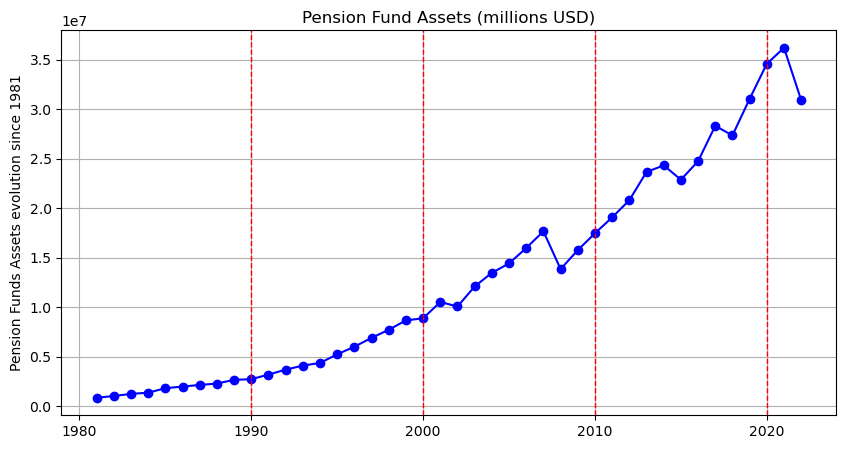

In [45]:
# Create the plot
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the line chart
plt.plot(pfa_sum_df['year_x'], pfa_sum_df['OECD_PFA_USD'], marker='o', linestyle='-', color='b')

# Define the years where vertical lines will be placed
marked_years = [1990, 2000, 2010, 2020]

# Add vertical lines at specified years
for year in marked_years:
    plt.axvline(x=year, color='r', linestyle='--', linewidth=1)

# Add labels and title to the plot
plt.title('Pension Fund Assets (millions USD)')
#plt.xlabel('Year')
plt.ylabel('Pension Funds Assets evolution since 1981')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

In [46]:
pfa_avg = df_qog_oecd.groupby('year_x')['OECD_PFA_PC_GDP'].mean() 
pfa_avg_df = pfa_avg.reset_index() 

print(round(pfa_avg_df,2))

    year_x  OECD_PFA_PC_GDP
0     1981            27.81
1     1982            32.40
2     1983            35.74
3     1984            35.34
4     1985            43.66
5     1986            45.15
6     1987            45.86
7     1988            45.48
8     1989            49.13
9     1990            47.61
10    1991            53.96
11    1992            63.96
12    1993            69.48
13    1994            67.80
14    1995            37.48
15    1996            41.39
16    1997            45.73
17    1998            47.61
18    1999            41.43
19    2000            39.86
20    2001            27.53
21    2002            24.67
22    2003            26.04
23    2004            25.55
24    2005            28.21
25    2006            29.63
26    2007            29.69
27    2008            26.34
28    2009            28.27
29    2010            29.57
30    2011            28.39
31    2012            30.36
32    2013            34.18
33    2014            36.91
34    2015          

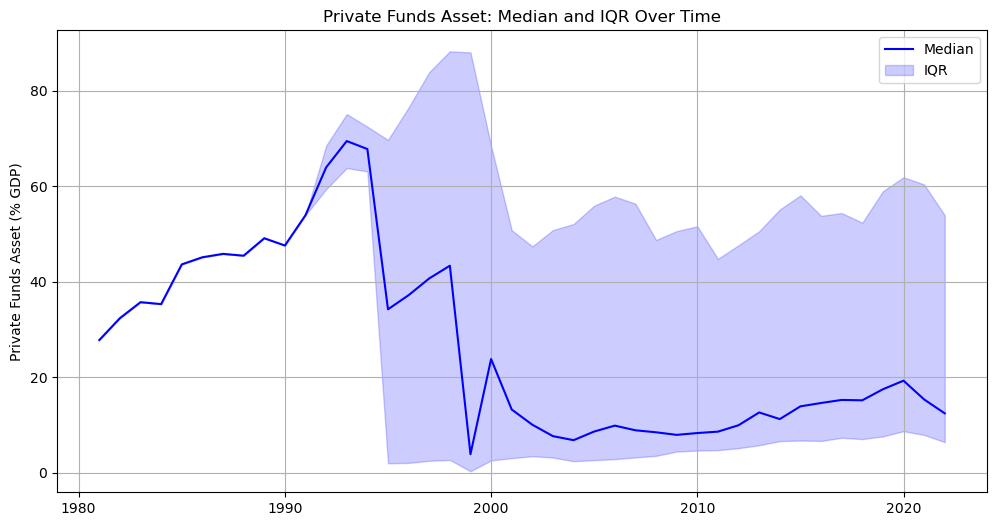

In [47]:
# Group by year and calculate median and IQR
grouped = df_qog_oecd.groupby('year_x')['OECD_PFA_PC_GDP']
median_data = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)
iqr = q3 - q1

# Determine outliers
outliers = df_qog_oecd.apply(
    lambda row: row['OECD_PFA_PC_GDP'] < q1.loc[row['year_x']] - 1.5 * iqr.loc[row['year_x']] or
                row['OECD_PFA_PC_GDP'] > q3.loc[row['year_x']] + 1.5 * iqr.loc[row['year_x']],
    axis=1
)

# Filter out the outliers
outliers_data = df_qog_oecd[outliers]

# Plot the median line
plt.figure(figsize=(12, 6))
plt.plot(median_data.index, median_data.values, color='blue', label='Median')

# Shade the IQR
plt.fill_between(median_data.index, q1.values, q3.values, color='blue', alpha=0.2, label='IQR')

# Plot outliers as red dots
#plt.scatter(outliers_data['year_x'], outliers_data['OECD_PFA_PC_GDP'], color='purple', label='Outliers', zorder=5)

# Add labels, title, and legend
plt.title('Private Funds Asset: Median and IQR Over Time')
#plt.xlabel('Year')
plt.ylabel('Private Funds Asset (% GDP)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [48]:
df_qog_oecd.columns
df_qog_oecd = df_qog_oecd.drop(columns=['year_y'], axis=1)

In [49]:
df_qog_oecd.to_csv('../Data/df_qog_oecd.csv', index=False)  

In [50]:
df_qog_oecd.columns

Index(['ccode', 'cname', 'year_x', 'ccode_qog', 'cname_qog', 'ccodealp',
       'version', 'cname_year', 'ccodealp_year', 'al_religion2000',
       ...
       'oecd_gengovdistri_t1e', 'oecd_gengovdistri_t1f',
       'oecd_gengovdistri_t1g', 'oecd_gengovdistri_t1h', 'gtr_centaxdir1850',
       'gtr_centaxtot1800', 'country', 'OECD_PPA', 'OECD_PFA_USD',
       'OECD_PFA_PC_GDP'],
      dtype='object', length=1123)

# Bivariate analysis

In [51]:
num = df_qog_oecd.select_dtypes(include="number")
num.columns

Index(['ccode', 'year_x', 'ccode_qog', 'al_religion2000', 'al_ethnic2000',
       'al_language2000', 'ccodecow', 'sai_statehiste0', 'sai_statehiste01',
       'sai_statehiste1',
       ...
       'oecd_gengovdistri_t1d', 'oecd_gengovdistri_t1e',
       'oecd_gengovdistri_t1f', 'oecd_gengovdistri_t1g',
       'oecd_gengovdistri_t1h', 'gtr_centaxdir1850', 'gtr_centaxtot1800',
       'OECD_PPA', 'OECD_PFA_USD', 'OECD_PFA_PC_GDP'],
      dtype='object', length=1116)

In [52]:
# Calculating the Spearman correlation coefficients between 'OECD_PFA_PC_GDP' and all other numerical variables
correlations = num.corrwith(num["OECD_PFA_PC_GDP"], method="spearman")
clean_correlations = correlations.dropna()
sorted_correlations = clean_correlations.sort_values(ascending=False)
print(sorted_correlations)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


OECD_PFA_PC_GDP        1.000000
oecd_houswealth_t1f    0.841007
OECD_PFA_USD           0.763010
oecd_emplage_t1a       0.717995
wdi_lfpyne             0.712918
                         ...   
oecd_taxapw_t1        -0.536846
kun_wiqreco_all       -0.540256
nrmi_nrpi             -0.566975
oecd_houswealth_t1a   -0.576847
kun_wiqreco_full      -0.605355
Length: 1076, dtype: float64


**Theory variables**
- **wdi_gdpgr: GDP growth (annual %)**
    Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2010 U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.
    Times series: 1961-2022. Countries: 40
    
- **wdi_gdpcapcon2015: GDP per capita (constant 2015 US dollar)**
    GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2015 U.S. dollars.
    Times series: 1960-2022. Countries: 40

- **wdi_gdpcappppcon2017: GDP per capita, PPP (constant 2017 international dollar)**
    GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser’s prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.
    Data are in constant 2017 international dollars.
    Times series: 1990-2022. Countries: 39

- **wdi_inflation: Inflation, consumer prices (annual %)**
    Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.
    Times series: 1960-2022. Countries: 40
    
- **wdi_fertility: Fertility rate, total (births per woman)**
    Total fertility rate represents the number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year.
    Times series: 1960-2021. Countries: 40

**Variables with the highest correlations**

- **oecd_houswealth_t1a: Financial asset of households - Currency and deposits :** 
    Financial asset of households as a percentage of total financial assets: currency and deposits
    Times series: 1995-2018. Countries: 36

- **oecd_houswealth_t1f: Financial asset of households: Pension funds :**
    Financial asset of households as a percentage of total financial assets: pension funds
    Times series: 1995-2018. Countries: 33
    
- **oecd_emplage_t1a: Employment rates for age group 15-24**
    Employment rates for age group 15-24 as a percentage of population in that age group
    Times series: 1955-2018. Countries: 37

- **wdi_lfpyne: Labor force participation rate 15-24, total (%) (national est.)**
    Labor force participation rate 15-24, total (%) (national estimate). Labor force participation rate for ages 15-24 is the proportion of the population ages 15-24 that is economically active: all people who supply labor for the production of goods and services during a specified period.
    Times series: 1960-2022. Countries: 40

- **oecd_taxapw_t1: Taxes on the average worker**
    Taxes on the average worker as a percentage of labour cost
    Times series: 2000-2018. Countries: 36

- **kun_wiqreco_all: Economic World Institutional Quality Ranking (all countries)**
    Economic World Institutional Quality Ranking (all countries).
    Times series: 1990-2010. Countries: 39

- **nrmi_nrpi: Natural Resource Protection Indicator**
    Natural Resource Protection Indicator assesses whether a country is protecting at least 17% of all of its biomes (e.g. deserts, forests, grasslands, aquatic, and tundra). It is designed to capture the comprehensiveness of a government’s commitment to habitat preservation and biodiversity protection. The World Wildlife Fund provides the underlying biome data, and the United Nations Environment Program World Conservation Monitoring Center provides the underlying data on protected areas.
    Times series: 1995-2022. Countries: 38

- **kun_wiqreco_full: Economic World Institutional Quality Ranking (full obs.)**
    Economic World Institutional Quality Ranking (countries with full observations).
    Times series: 1990-2010. Countries: 32

In [53]:
num.corr() # Correlation Matrix

ccode    year_x  ccode_qog  al_religion2000  \
ccode              1.000000 -0.157100   1.000000         0.110064   
year_x            -0.157100  1.000000  -0.157100        -0.165950   
ccode_qog          1.000000 -0.157100   1.000000         0.110064   
al_religion2000    0.110064 -0.165950   0.110064         1.000000   
al_ethnic2000      0.024070 -0.054114   0.024070         0.116318   
...                     ...       ...        ...              ...   
gtr_centaxdir1850  0.117274 -0.218981   0.117274        -0.356250   
gtr_centaxtot1800 -0.894083  0.324466  -0.894083        -0.157777   
OECD_PPA           0.332368  0.015052   0.332368         0.367941   
OECD_PFA_USD       0.356077  0.000132   0.356077         0.407522   
OECD_PFA_PC_GDP   -0.007258  0.066577  -0.007258         0.331962   

                   al_ethnic2000  al_language2000  ccodecow  sai_statehiste0  \
ccode                   0.024070        -0.002214 -0.117326         0.150089   
year_x                 -0.054114        -0.045237  0.114122         0.091985   
ccode_qog               0.024070        -0.002214 -0.117326         0.150089   
al_religion2000         0.116318         0.272948  0.124105        -0.271978   
al_ethnic2000           1.000000         0.567556 -0.363000        -0.334666   
...                          ...              ...       ...              ...   
gtr_centaxdir1850      -0.465327         0.153001  0.838348         0.082586   
gtr_centaxtot1800      -0.141582        -0.494422  0.140150         0.631535   
OECD_PPA                0.211586         0.035185 -0.276151        -0.214296   
OECD_PFA_USD            0.201274         0.037005 -0.277224        -0.214848   
OECD_PFA_PC_GDP        -0.109445         0.172019 -0.060345        -0.203716   

                   sai_statehiste01  sai_statehiste1  sai_statehisten0  \
ccode                      0.160802         0.177936          0.050817   
year_x                     0.096022         0.078192          0.052861   
ccode_qog                  0.160802         0.177936          0.050817   
al_religion2000           -0.260627        -0.268356         -0.298713   
al_ethnic2000             -0.393409        -0.524504         -0.002494   
...                             ...              ...               ...   
gtr_centaxdir1850          0.140729         0.553592         -0.215473   
gtr_centaxtot1800          0.617231         0.430270          0.521792   
OECD_PPA                  -0.228170        -0.219064         -0.103103   
OECD_PFA_USD              -0.228067        -0.219818         -0.111892   
OECD_PFA_PC_GDP           -0.204199        -0.113032         -0.170178   

                   sai_statehisten01  sai_statehisten1  vdem_liberal  \
ccode                       0.049797          0.049795     -0.112569   
year_x                      0.057123          0.073044     -0.131917   
ccode_qog                   0.049797          0.049795     -0.112569   
al_religion2000            -0.299951         -0.278580      0.362217   
al_ethnic2000              -0.012778         -0.054369     -0.298719   
...                              ...               ...           ...   
gtr_centaxdir1850          -0.215390         -0.213085      0.718167   
gtr_centaxtot1800           0.529689          0.592174     -0.196319   
OECD_PPA                   -0.107825         -0.126405      0.077151   
OECD_PFA_USD               -0.117245         -0.138256      0.087073   
OECD_PFA_PC_GDP            -0.185647         -0.245420      0.244360   

                   vdem_mecorrpt  br_suff  br_scoup  br_regch   br_pres  \
ccode                  -0.154779      NaN       NaN       NaN  0.106246   
year_x                 -0.102682      NaN       NaN       NaN -0.031819   
ccode_qog              -0.154779      NaN       NaN       NaN  0.106246   
al_religion2000         0.333011      NaN       NaN       NaN -0.264807   
al_ethnic2000          -0.223805      NaN       NaN       NaN -0.010828   
...                         

In [54]:
col_num = ['year_x','wdi_gdpgr', 'wdi_gdpcapcon2015', 'wdi_gdpcappppcon2017', 'wdi_inflation', 'wdi_fertility', 
            'oecd_houswealth_t1a', 'oecd_houswealth_t1f','oecd_emplage_t1a', 'wdi_lfpyne', 'oecd_taxapw_t1', 
            'kun_wiqreco_all', 'nrmi_nrpi', 'kun_wiqreco_full',
            'OECD_PPA', 'OECD_PFA_USD', 'OECD_PFA_PC_GDP']
df_num = df_qog_oecd[col_num]

In [55]:
round(df_num. describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
year_x,739.0,2010.89,7.50,1981.00,2006.00,2012.00,2017.00,2022.00
wdi_gdpgr,739.0,2.53,3.44,-14.63,1.36,2.64,4.24,24.37
wdi_gdpcapcon2015,739.0,33742.31,21034.11,4007.53,16009.29,33751.70,44900.88,112417.88
wdi_gdpcappppcon2017,730.0,40480.63,18501.35,9146.40,29165.11,40053.57,48179.82,120647.82
wdi_inflation,739.0,2.89,3.78,-4.48,1.15,2.26,3.52,72.31
wdi_fertility,707.0,1.71,0.37,0.81,1.44,1.66,1.89,3.11
oecd_houswealth_t1a,480.0,33.05,15.57,9.67,20.88,30.59,43.94,78.68
oecd_houswealth_t1f,446.0,17.51,15.92,0.00,5.05,10.59,28.52,59.34
oecd_emplage_t1a,541.0,40.42,14.70,11.85,27.62,39.85,53.91,77.60
wdi_lfpyne,734.0,47.79,14.39,20.72,35.06,47.44,59.73,83.02


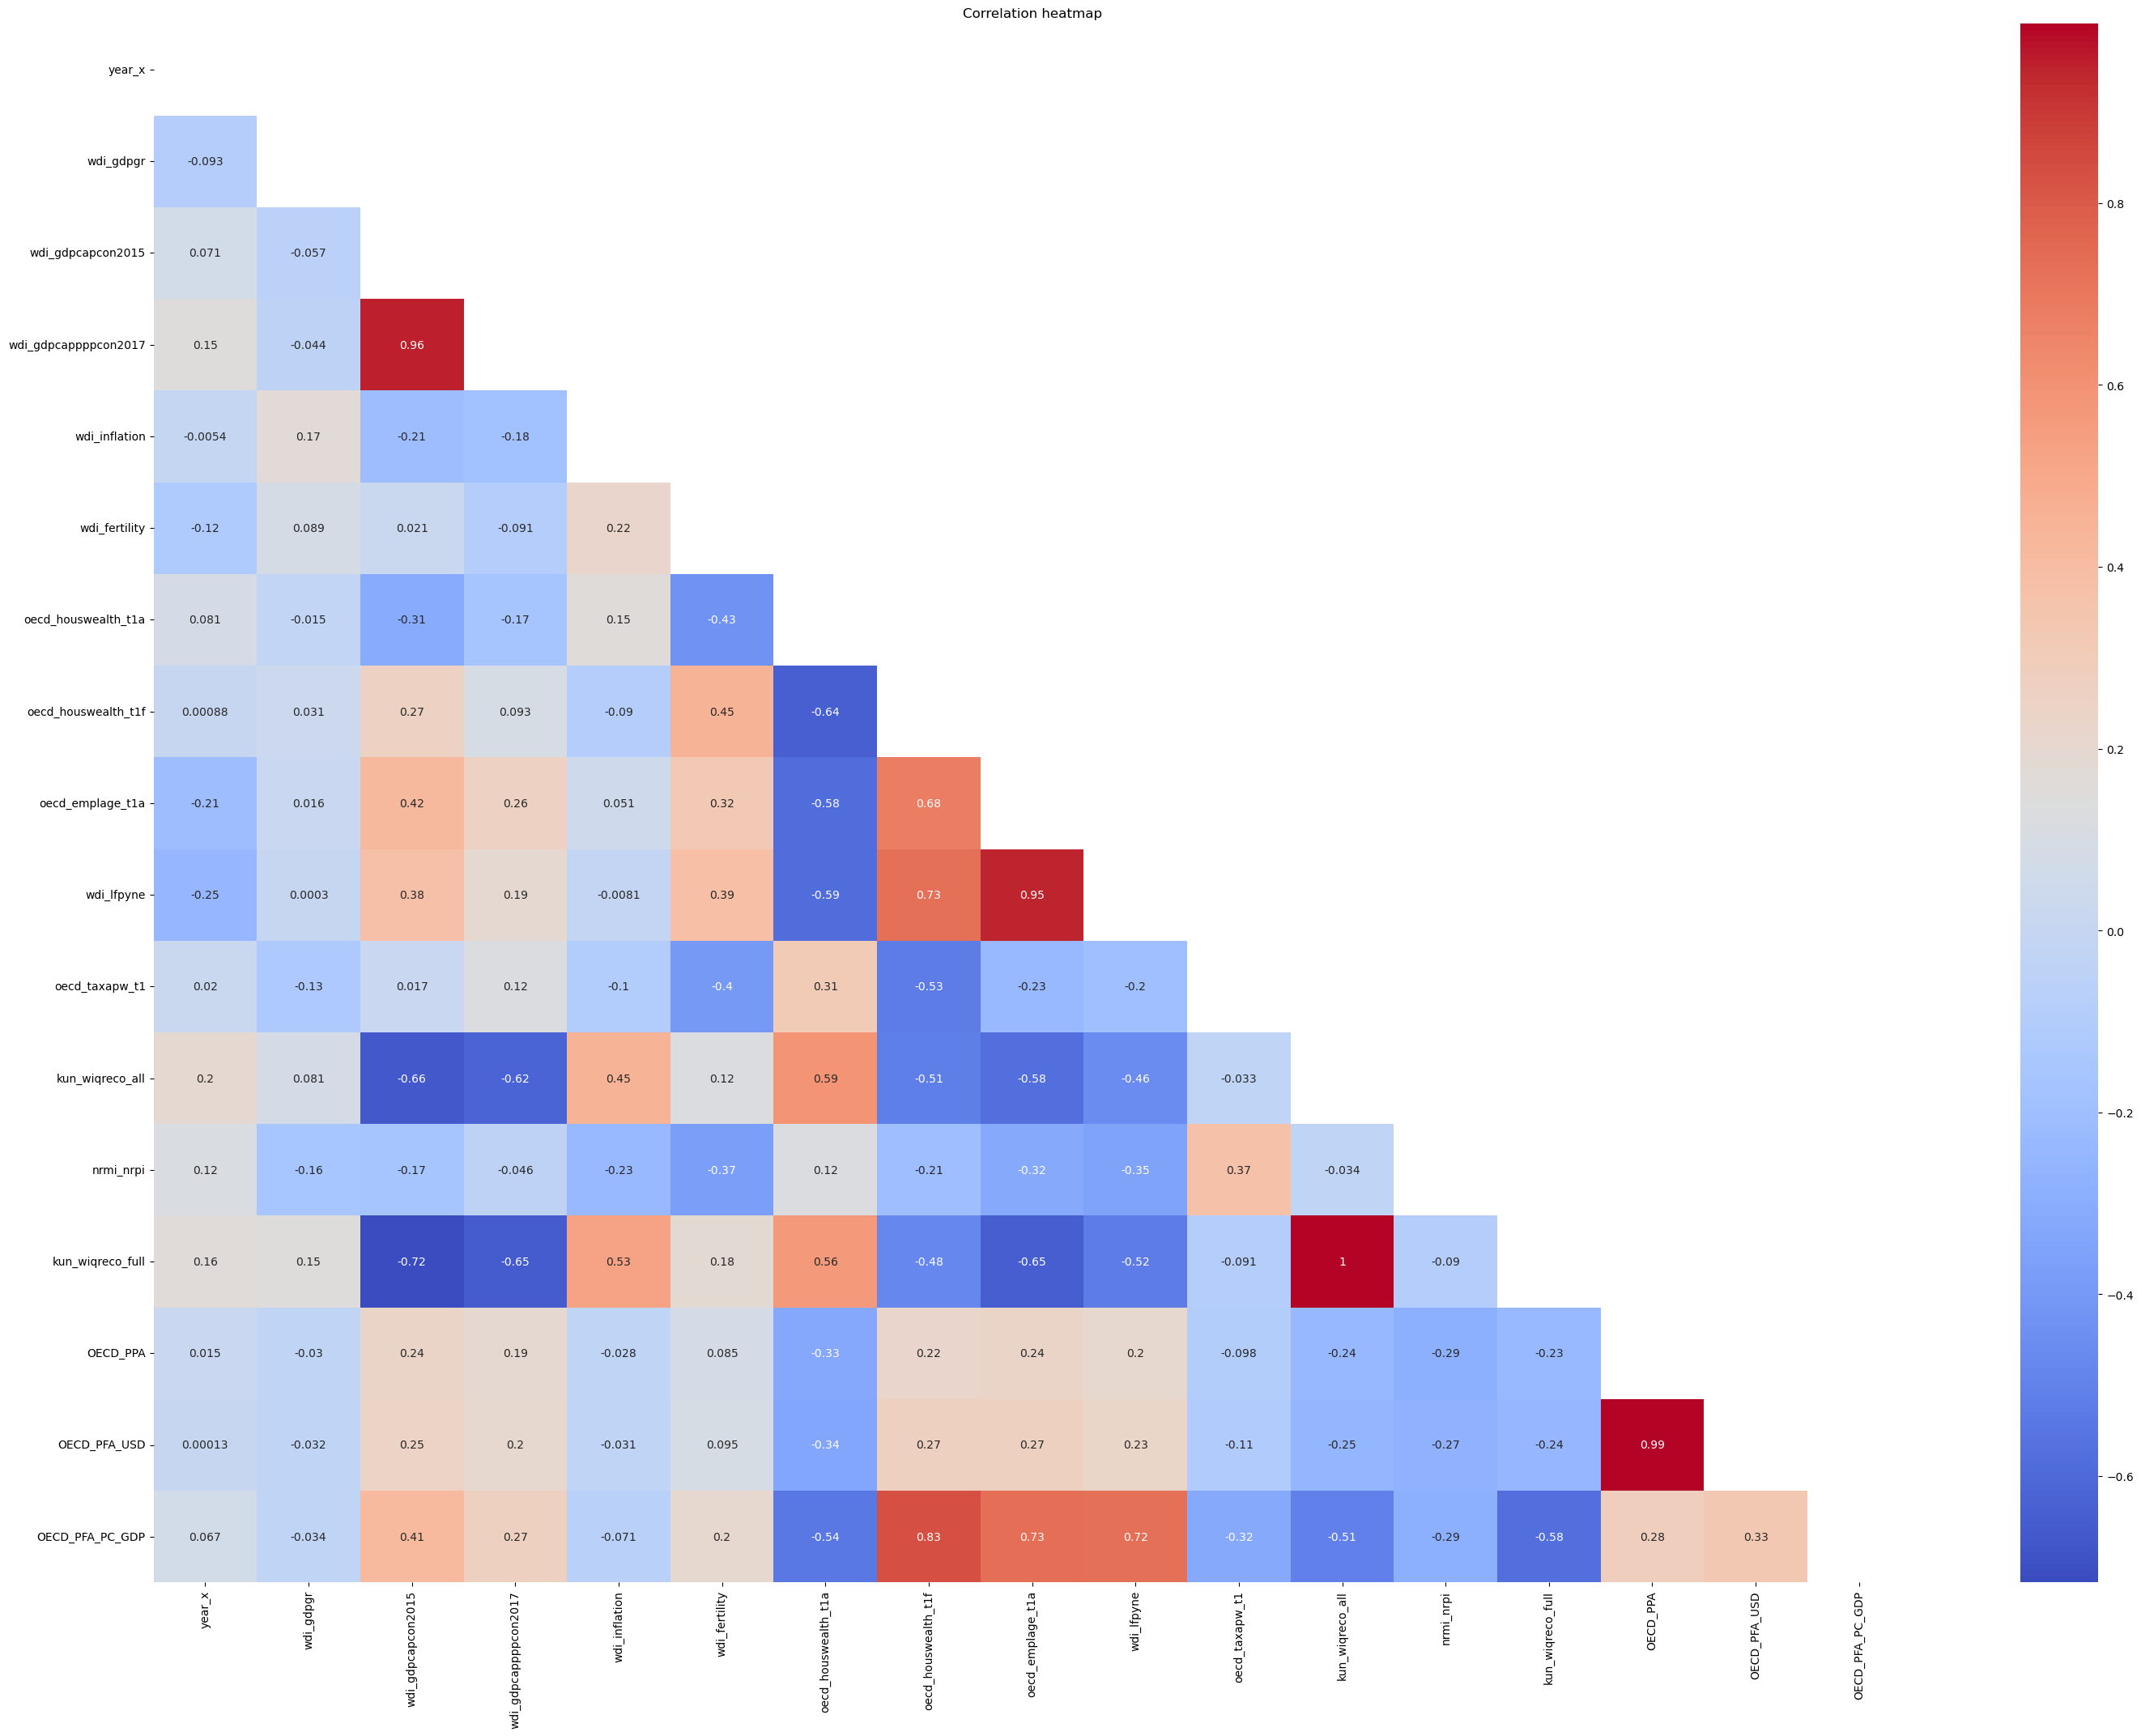

In [56]:
correlation_matrix = df_num.corr() 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")

plt.title("Correlation heatmap")
plt.show()

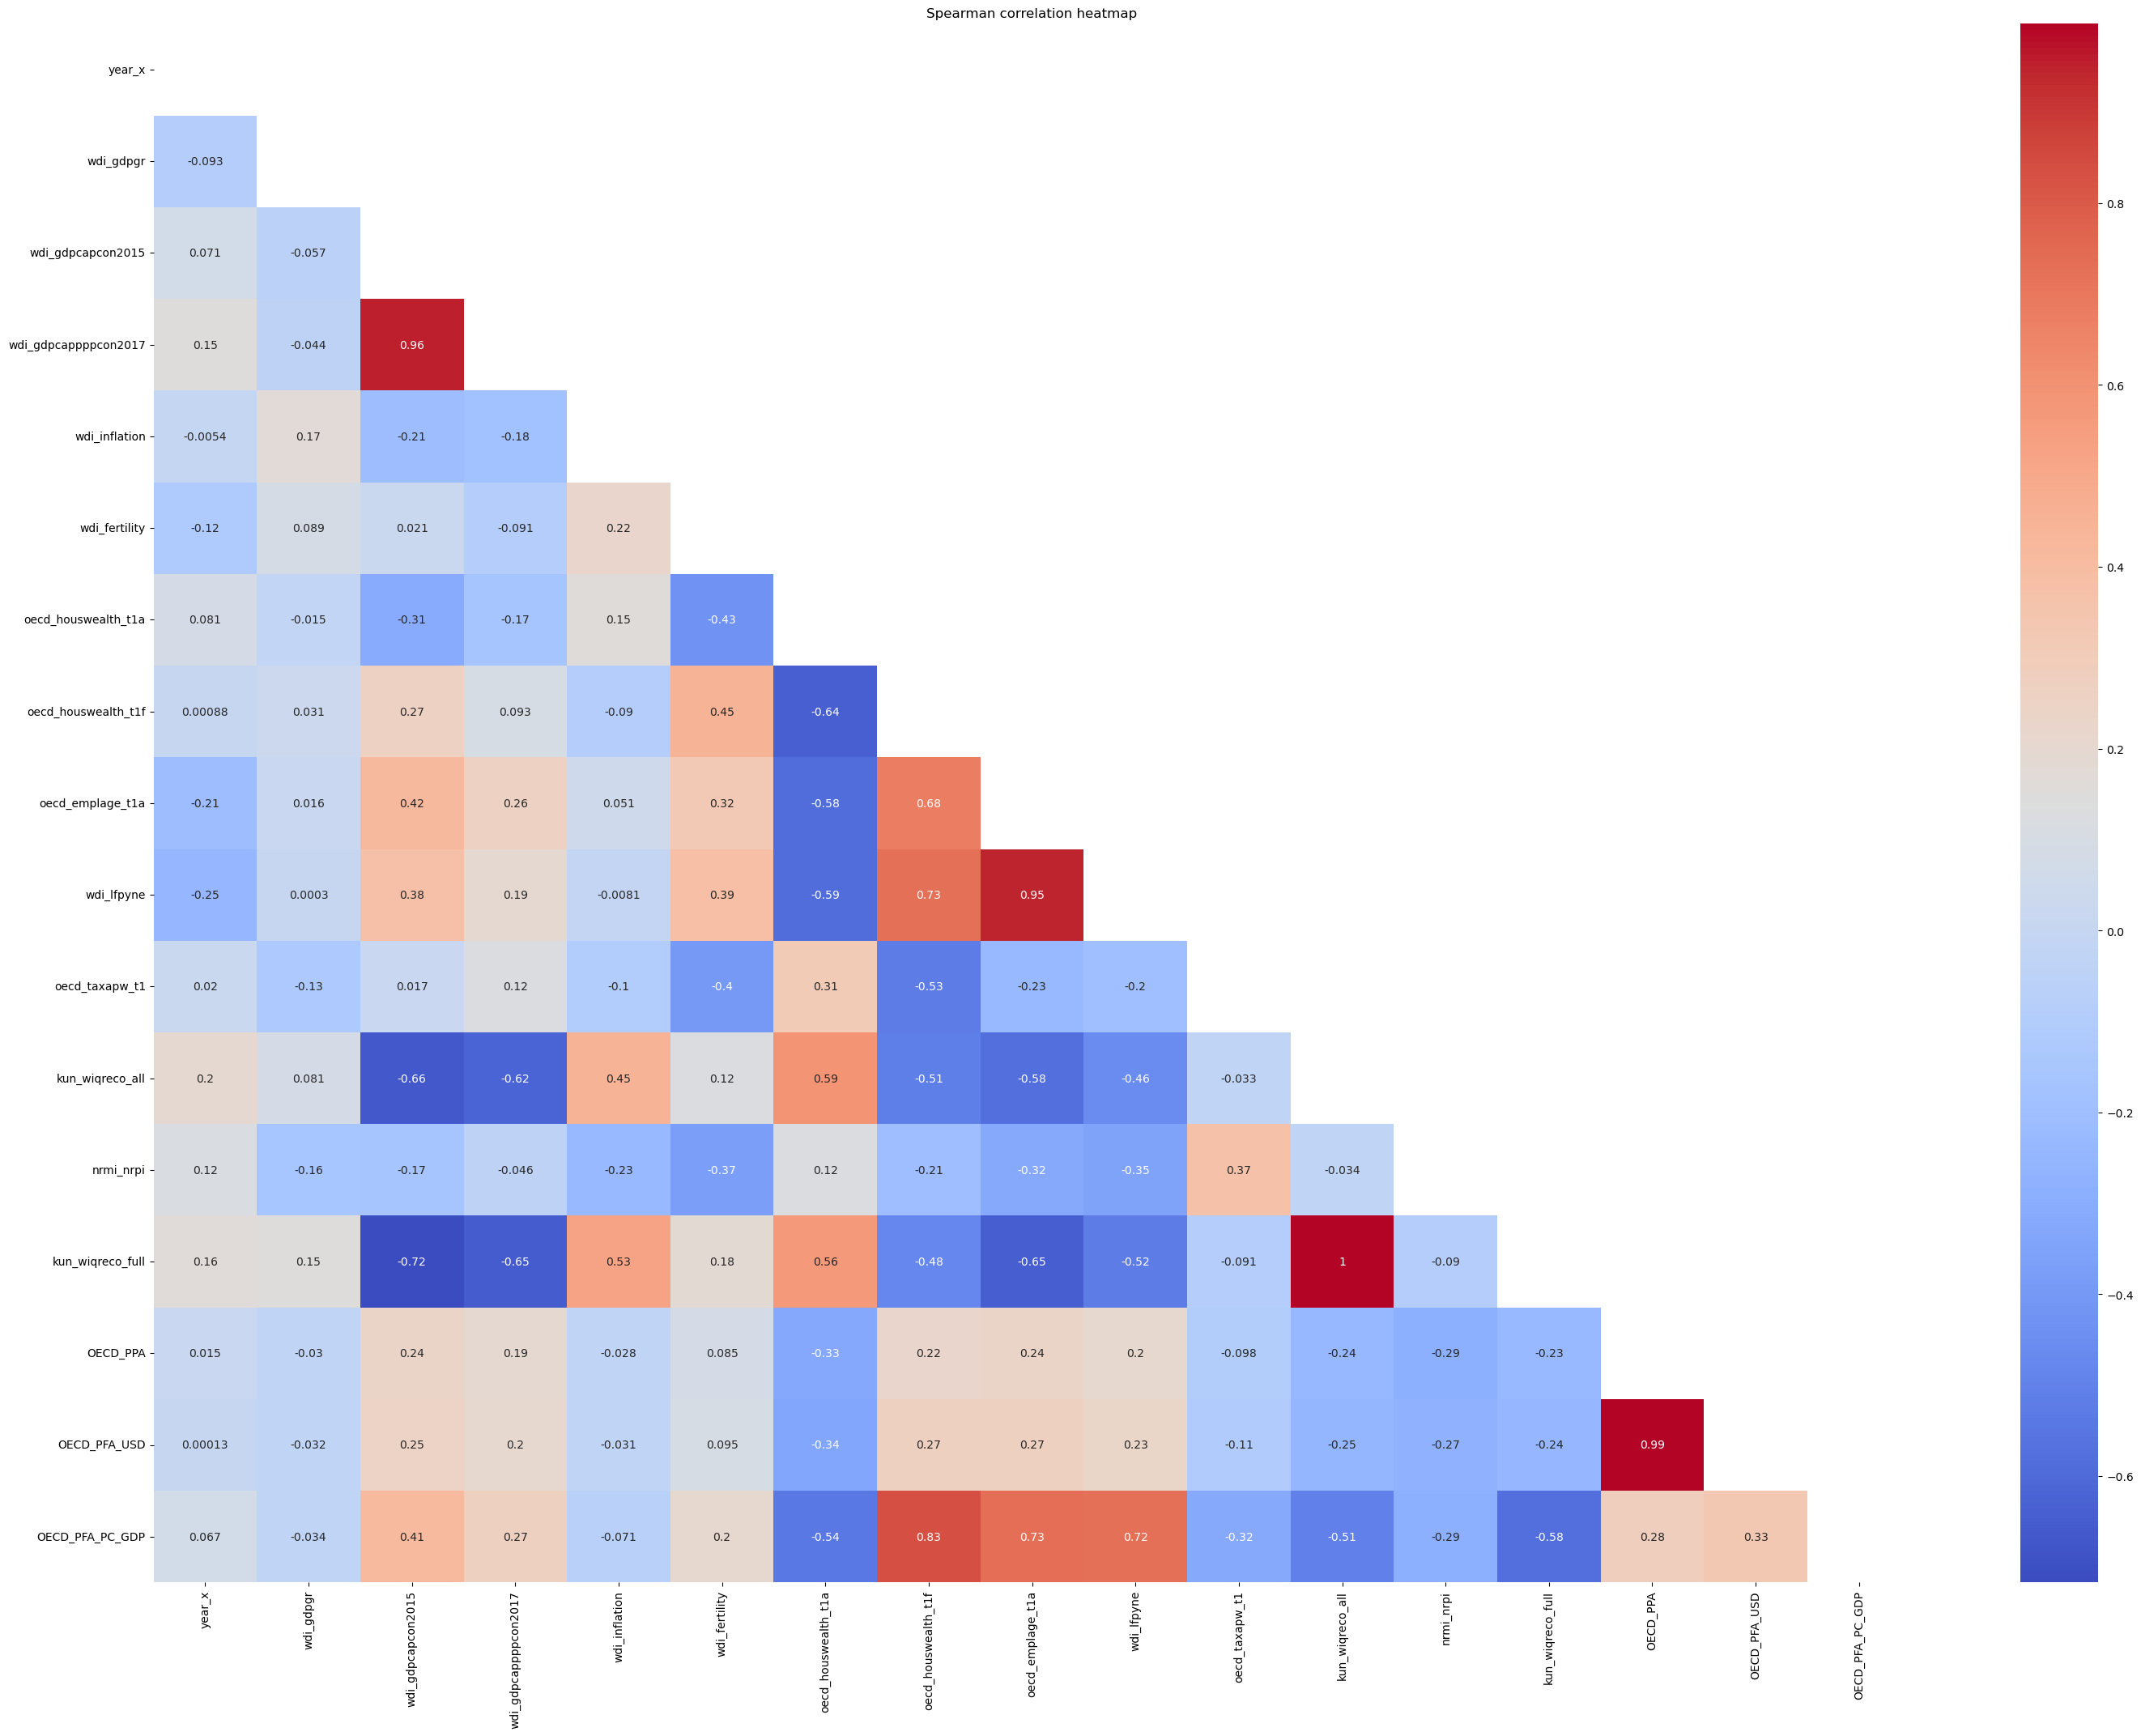

In [57]:
correlation_matrix2 = df_num.corr(method="spearman") 
mask = np.triu(np.ones_like(correlation_matrix2, dtype=bool))
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")

plt.title("Spearman correlation heatmap")
plt.show()

# Merging with pension reforms

In [58]:
df_qog_oecd.columns

Index(['ccode', 'cname', 'year_x', 'ccode_qog', 'cname_qog', 'ccodealp',
       'version', 'cname_year', 'ccodealp_year', 'al_religion2000',
       ...
       'oecd_gengovdistri_t1e', 'oecd_gengovdistri_t1f',
       'oecd_gengovdistri_t1g', 'oecd_gengovdistri_t1h', 'gtr_centaxdir1850',
       'gtr_centaxtot1800', 'country', 'OECD_PPA', 'OECD_PFA_USD',
       'OECD_PFA_PC_GDP'],
      dtype='object', length=1123)

In [59]:
df_qog_oecd.head()

,ccode,cname,year_x,ccode_qog,cname_qog,ccodealp,version,cname_year,ccodealp_year,al_religion2000,al_ethnic2000,al_language2000,ccodecow,sai_statehiste0,sai_statehiste01,sai_statehiste1,sai_statehisten0,sai_statehisten01,sai_statehisten1,vdem_liberal,vdem_mecorrpt,br_suff,br_scoup,br_regch,br_pres,br_newconst,br_elect,br_elecyear,br_cw,br_elecpost,br_dem,vdem_libdem,br_coup,br_mon,vdem_jucorrdc,vdem_dl_delib,vdem_exembez,ht_colonial,ht_region,top_top10_income_share,top_top1_income_share,vdem_academ,vdem_corr,vdem_exthftps,vdem_delibdem,vdem_edcomp_thick,vdem_egal,vdem_egaldem,vdem_exbribe,vdem_excrptps,vdem_execorr,br_com,br_col,br_fcoup,vdem_partip,wdi_pop,wdi_pop65,wdi_popf,wdi_poprul,wdi_poprulgr,wdi_popurb,wdi_pop1564,wdi_wombuslawi,wdi_popurbagr,wdi_pop14,vdem_partipdem,vdem_polyarchy,vdem_pubcorr,wdi_agedr,wdi_popgr,ef_bul,une_tdurls,ef_fg,ef_for,une_oeals,une_oaepe,ef_carb,ef_crop,wdi_tele,ef_ef,ef_gl,une_oeaus,une_tdurce,une_tdurused,vdem_gender,wdi_inflation,vdem_gcrrpt,vdem_elvotbuy,br_pvote,br_chpar,wdi_mobile,who_infmortm,who_infmortt,wdi_lifexp,wdi_fertility,wdi_mortu5m,wdi_death,wdi_birth,dr_sg,dr_pg,dr_ig,who_infmortf,dr_eg,ccp_syst,wdi_lifexpm,wdi_mortu5f,wdi_mortu5,wdi_mortnn,wdi_lifexpf,wdi_mortinfm,wdi_mortinff,wdi_mortinf,wdi_migration,wgov_totage,wgov_minage,sci_base,wgov_minten,wgov_minmil,wgov_mret,wgov_leadexp,wgov_min,wgov_totten,wgov_totmil,wgov_minfem,wgov_totfem,wgov_tot,fe_etfra,ciri_disap,fe_plural,fe_cultdiv,ciri_tort,ciri_kill,ciri_physint,ciri_polpris,wgov_tret,wdi_gdpcapcur,wdi_export,wdi_trade,wdi_import,ictd_taxinsc,wdi_gdpcapcon2015,wdi_gdpgr,wdi_gdpcapgr,wdi_fdiin,fh_status,fh_pr,fh_cl,cbie_lendingref,cbie_boardref,cbie_index,cbie_gmt,cbie_financesref,cbie_finances,cbie_board,cbie_lending,cbie_lvau,cbie_cwne,cbie_reportref,cbie_report,cbie_policyref,cbie_policy,cbie_obj,cbie_objref,bmr_demmis,bmr_dembr,bmr_demtran,bmr_dem,bmr_demdur,bmr_demfsuf,fao_luagr,fao_luagrara,wdi_araland,fao_luagrcrop,fao_lucrop,wdi_popden,wdi_area,wdi_precip,cbie_indexref,gd_ptss,wdi_gnicur,wdi_fdiout,wdi_mortm,wdi_mortf,ciri_dommov,ciri_elecsd,ciri_speech,ciri_assn,ictd_taxexsc,ciri_injud,sci_comp,sci_fisc,wdi_expmil,wdi_refasy,ictd_soccon,wdi_oilrent,ccp_strike,ccp_cc,ccp_slave,ccp_samesexm,ccp_marriage,ccp_market,ccp_initiat,ccp_infoacc,ccp_hr,ccp_freerel,ccp_equal,ccp_democ,ccp_buildsoc,ccp_civil,ccp_socialsm,ccp_childwrk,ccp_taxes,ictd_taxindirect,ictd_taxgs,ictd_taxinc,ictd_taxother,ictd_taxtrade,wdi_unempne,pwt_sgcf,pwt_rt,pwt_rgdp,pwt_pop,pwt_pli,pwt_plhc,pwt_plcf,pwt_ple,ihme_lifexp_0104t,pwt_mi,pwt_me,pwt_hci,pwt_gc,pwt_plgc,ihme_lifexp_0104m,ihme_lifexp_0104f,pwt_xr,pwt_shhc,pwt_slcgdp,wui_wtui,wui_wui,wdi_unempfne,wdi_unempmne,who_alcohol10,ciri_relfre,rd_inw,ccp_systyear,ciri_formov,ictd_taxprop,wdi_gniatlcur,wdi_gnicapatlcur,ictd_taxpaywf,ictd_grants,wdi_gerp,pwt_csppp,pwt_cs,pwt_tfpppp,pwt_plcs,pwt_tfp,icrg_qog,wdi_lfpne15,wdi_lfpmne15,wdi_lfpfne15,mad_gdppc,bci_bci,bci_bcistd,van_index,atop_transyr,atop_ally,atop_consult,atop_defensive,atop_neutrality,van_comp,atop_offensive,van_part,atop_nonagg,atop_number,oecd_cpi_t1a,wdi_gerpf,wdi_gerpm,ciri_wopol,oecd_oilprod_t1,wdi_gers,ictd_taxind,wdi_lfpymne,wdi_lfpyne,oecd_welecgen_t1,oecd_rnewable_t1,oecd_tpes_t1,oecd_wenergys_t1,wdi_lfpyfne,ictd_taxcorp,ciri_wecon,wdi_armimp,wdi_empprne,wdi_empprmne,wdi_empprfne,wdi_tradeserv,fao_luagrirreqcrop,oecd_rtsconv_t1a,p_polity2,wdi_gersm,oecd_airqty_t1,p_durable,wdi_gersf,oecd_tradegdp_t1a,oecd_tradegdp_t1b,wdi_unempyne,oecd_evogdp_t1,ictd_taxres,wdi_interexp,who_matmort,wdi_unempymne,oecd_invrates_t1,ictd_taxnresinsc,oecd_sizegdp_t1,wdi_unempyfne,oecd_lifeexpy_g1,oecd_lifeexpy_g2a,oecd_lifeexpy_g2b,wdi_taxrev,h_f,h_l1,h_l2,h_polcon3,h_polcon5,h_j,chisols_demtrans,chisols_indmil,chisols_dem,chisols_auttrans,chisols_warlord,chisols_mixed,chisols_mon,chisols_autend,chisols_hybrid,chisols_nonindep,chisols_totalldrtrans,chisols_other,chisols_olig,chisols_per,chisols_pres,chisols_regtrans,chisols_mil,oecd_prodincom_g

In [60]:
col_num2 = ['year_x', 'ccodealp', 'ccodealp_year', 'wdi_gdpgr', 'wdi_gdpcapcon2015', 'wdi_gdpcappppcon2017', 'wdi_inflation', 'wdi_fertility', 
            'oecd_houswealth_t1a', 'oecd_houswealth_t1f','oecd_emplage_t1a', 'wdi_lfpyne', 'oecd_taxapw_t1', 
            'kun_wiqreco_all', 'nrmi_nrpi', 'kun_wiqreco_full',
            'OECD_PPA', 'OECD_PFA_USD', 'OECD_PFA_PC_GDP']
df_num2 = df_qog_oecd[col_num2]

In [61]:
df_num2.columns

Index(['year_x', 'ccodealp', 'ccodealp_year', 'wdi_gdpgr', 'wdi_gdpcapcon2015',
       'wdi_gdpcappppcon2017', 'wdi_inflation', 'wdi_fertility',
       'oecd_houswealth_t1a', 'oecd_houswealth_t1f', 'oecd_emplage_t1a',
       'wdi_lfpyne', 'oecd_taxapw_t1', 'kun_wiqreco_all', 'nrmi_nrpi',
       'kun_wiqreco_full', 'OECD_PPA', 'OECD_PFA_USD', 'OECD_PFA_PC_GDP'],
      dtype='object')

In [62]:
df_reforms.head()

,Unnamed: 0,country,iso,year,iso_year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment,ccode,dup
0,1,Australia,AUS,2006,AUS2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36,0
1,2,Australia,AUS,2008,AUS2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,36,0
2,3,Australia,AUS,2009,AUS2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,36,0
3,4,Australia,AUS,2010,AUS2010,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,36,0
4,5,Australia,AUS,2012,AUS2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,1,36,0


In [63]:
df_reforms.columns

Index(['Unnamed: 0', 'country', 'iso', 'year', 'iso_year', 'benefits_expand',
       'benefits_contract', 'benefits_both', 'contributions_expand',
       'contributions_contract', 'contributions_both', 'coverage_expand',
       'coverage_contract', 'coverage_both', 'diversificationsecurity_expand',
       'diversificationsecurity_contract', 'diversificationsecurity_both',
       'fees_expand', 'fees_contract', 'fees_both', 'taxes_expand',
       'taxes_contract', 'taxes_both', 'onlybenefits', 'onlycontributions',
       'onlycoverage', 'onlyds', 'onlyfees', 'onlytaxes', 'morethantwo',
       'morethanoneincludingtaxes', 'morethanonenottaxes', 'morethanoneyear',
       'investment', 'ccode', 'dup'],
      dtype='object')

In [64]:
df_reforms = df_reforms.rename(columns={'iso_year': 'ccodealp_year'})
df_reforms = df_reforms.rename(columns={'iso': 'ccodealp'})


In [65]:
# Transform 'ccodealp_year' values
df_reforms['ccodealp_year'] = df_reforms['ccodealp_year'].apply(lambda x: x[:3] + x[-2:])


In [66]:
df_qog_oecd_reforms = df_num2.merge(df_reforms, on='ccodealp_year')
print(df_qog_oecd_reforms.shape)

(275, 54)


In [71]:
df_qog_oecd_reforms.columns

Index(['ccodealp_year', 'wdi_gdpgr', 'wdi_gdpcapcon2015',
       'wdi_gdpcappppcon2017', 'wdi_inflation', 'wdi_fertility',
       'oecd_houswealth_t1a', 'oecd_houswealth_t1f', 'oecd_emplage_t1a',
       'wdi_lfpyne', 'oecd_taxapw_t1', 'kun_wiqreco_all', 'nrmi_nrpi',
       'kun_wiqreco_full', 'OECD_PPA', 'OECD_PFA_USD', 'OECD_PFA_PC_GDP',
       'country', 'ccodealp_y', 'year', 'benefits_expand', 'benefits_contract',
       'benefits_both', 'contributions_expand', 'contributions_contract',
       'contributions_both', 'coverage_expand', 'coverage_contract',
       'coverage_both', 'diversificationsecurity_expand',
       'diversificationsecurity_contract', 'diversificationsecurity_both',
       'fees_expand', 'fees_contract', 'fees_both', 'taxes_expand',
       'taxes_contract', 'taxes_both', 'onlybenefits', 'onlycontributions',
       'onlycoverage', 'onlyds', 'onlyfees', 'onlytaxes', 'morethantwo',
       'morethanoneincludingtaxes', 'morethanonenottaxes', 'morethanoneyear',
       '

In [70]:
df_qog_oecd_reforms.head()


,ccodealp_year,wdi_gdpgr,wdi_gdpcapcon2015,wdi_gdpcappppcon2017,wdi_inflation,wdi_fertility,oecd_houswealth_t1a,oecd_houswealth_t1f,oecd_emplage_t1a,wdi_lfpyne,oecd_taxapw_t1,kun_wiqreco_all,nrmi_nrpi,kun_wiqreco_full,OECD_PPA,OECD_PFA_USD,OECD_PFA_PC_GDP,country,ccodealp_y,year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment
0,AUS03,3.111398,48453.013801,40642.562284,2.732596,1.748,19.47675,46.42478,61.81840,70.22,28.246566,14.0,NaN,14.0,358915.039,358915.039,66.997,Austria,AUT,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,AUS06,2.740636,51605.314602,43286.723537,3.555288,1.908,16.57807,51.17390,63.69736,70.80,28.281561,11.0,NaN,9.0,678162.183,645868.776,86.987,Australia,AUS,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,AUS08,3.568270,53382.310059,44777.273719,4.350299,1.984,21.78497,49.43645,64.51452,70.75,26.931992,9.0,NaN,8.0,1095339.382,1058376.109,93.245,Australia,AUS,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AUS09,1.870487,53271.590189,44684.401494,1.771117,1.971,20.57404,53.02210,61.18265,69.10,26.748796,9.0,NaN,8.0,867428.773,839274.965,82.010,Australia,AUS,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0
4,AUS10,2.206566,53606.581445,44965.393364,2.918340,1.928,21.59504,53.17834,60.52081,68.43,26.829039,13.0,60.86891,12.0,1017081.539,986838.568,88.791,Australia,AUS,2010,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0


In [69]:
df_qog_oecd_reforms = df_qog_oecd_reforms.drop(columns=['ccode', 'dup', 'year_x', 'Unnamed: 0', 'ccodealp_x'], axis=1)

In [72]:
# List comprehension to select columns starting with "benefits", "coverage", "tax", or "fee"
reform_columns = [col for col in df_qog_oecd_reforms.columns if col.startswith(('benefits', 'contribution', 'coverage', 'taxes', 'fees', 'diversification'))]

# Create a new 'reforms' column as the sum of the selected columns
df_qog_oecd_reforms['reforms'] = df_qog_oecd_reforms[reform_columns].sum(axis=1)


In [73]:
# Save the DataFrame to a CSV file
df_qog_oecd_reforms.to_csv('../Data/df_qog_reforms.csv', index=False)